## visualize selected call samples

### A selected Fin Whale Detection

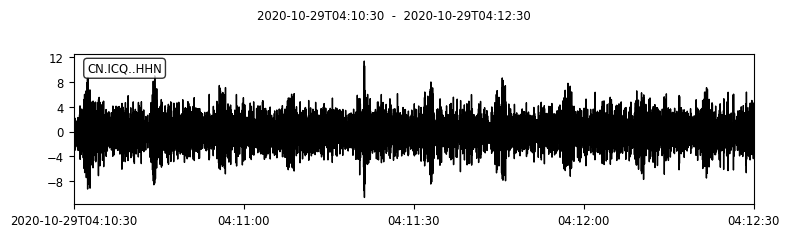

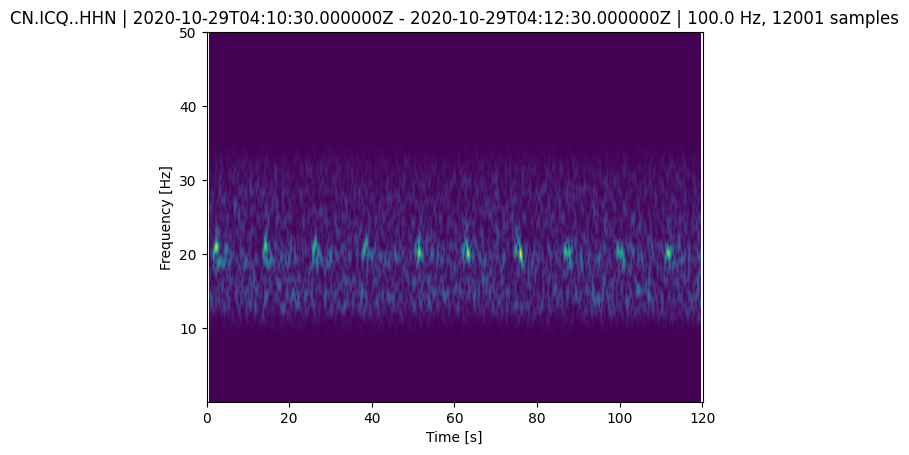

In [9]:
from obspy import read, UTCDateTime

data_path='/network/projects/aia/whale_call/RAW/'
station_name = 'ICQ'
channel = 'HHN'
call_t1 = UTCDateTime("20201029051032")
det_win = 120
data_year = call_t1.year
data_month = call_t1.month
data_day = call_t1.day

date_string = '%s%02d%02d'%(data_year,data_month,data_day)
file_patterns = data_path+date_string+'/'+ '%s.%02d.%02d.CN'%(data_year,data_month,data_day)+'*'+station_name+'*Z*.SAC'

st = read(data_path+date_string+"/"+'%s.%02d.%02d.CN'%(data_year,data_month,data_day)+".%s..%s.SAC"%(station_name,channel))
# st.taper(max_percentage=0.,type='cosine')
st.filter(
        "bandpass", freqmin=12, freqmax=32, zerophase=True
    )
T0 = UTCDateTime(date_string);
T1= st[0].meta['starttime'];
rel_t=2*(T0-T1);
call_t1 =call_t1-rel_t;
call_t2 = call_t1+det_win;

st_sliced = st.slice(starttime=call_t1,endtime=call_t2)
st_sliced.plot()
st_sliced.spectrogram();



### A selected BW Detection

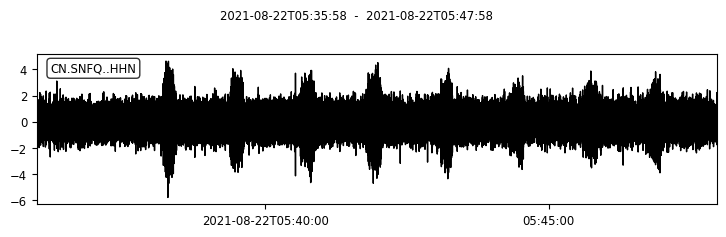

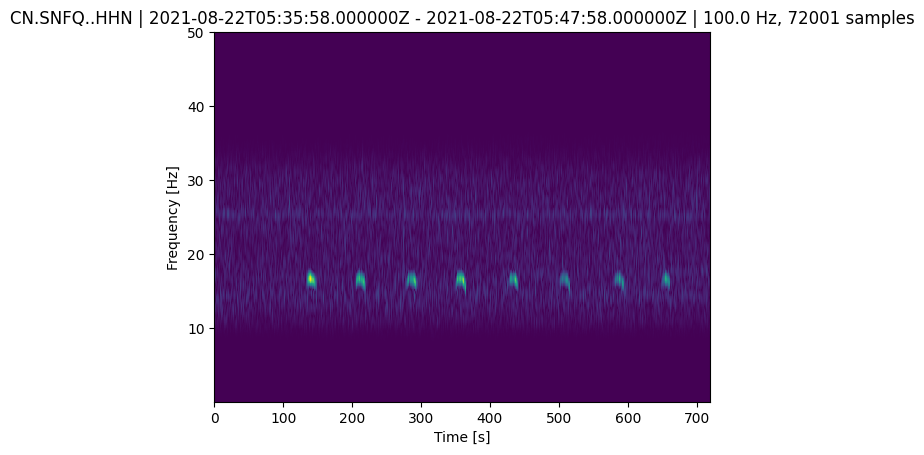

In [10]:
from obspy import read, UTCDateTime

data_path='/network/projects/aia/whale_call/RAW/'
station_name = 'SNFQ'
channel = 'HHZ'
call_t1 = UTCDateTime("20210822063600")
det_win = 720
data_year = call_t1.year
data_month = call_t1.month
data_day = call_t1.day

date_string = '%s%02d%02d'%(data_year,data_month,data_day)

st = read(data_path+date_string+"/"+'%s.%02d.%02d.CN'%(data_year,data_month,data_day)+".%s..%s.SAC"%(station_name,channel))
# st.taper(max_percentage=0.,type='cosine')
st.filter(
        "bandpass", freqmin=12, freqmax=32, zerophase=True
    )
T0 = UTCDateTime(date_string);
T1= st[0].meta['starttime'];
rel_t=2*(T0-T1);
call_t1 =call_t1-rel_t;
call_t2 = call_t1+det_win;

st_sliced = st.slice(starttime=call_t1,endtime=call_t2)
st_sliced.plot()
st_sliced.spectrogram();



## Visualize random samples from raw data

### FW Calls

#### Quality metric visualization

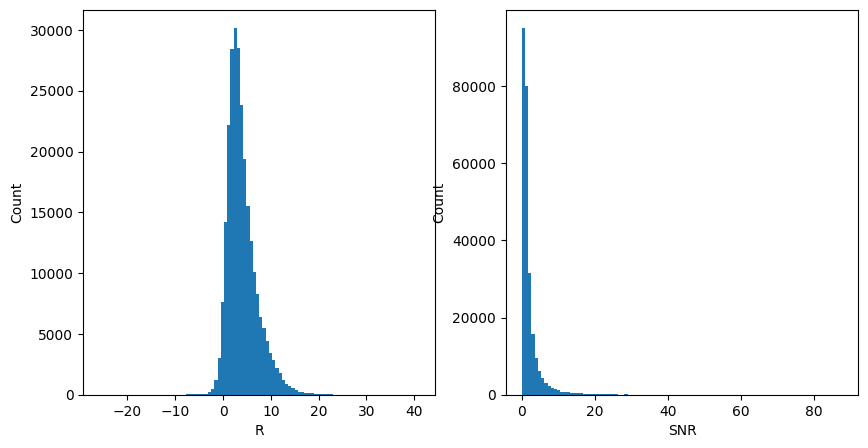

In [11]:
import pandas as pd
import numpy as np
from obspy import read, UTCDateTime
import matplotlib.pyplot as plt
fw_path = '/network/projects/aia/whale_call/LABELS/FW/'
fw_filt = pd.read_csv(fw_path+'fw_LQ_filt.csv')
## plot histogram of R and SNR in fw_filt  
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(fw_filt['R'],bins=100)
ax[0].set_xlabel('R')
ax[0].set_ylabel('Count')
ax[1].hist(fw_filt['SNR'],bins=100)
ax[1].set_xlabel('SNR')
ax[1].set_ylabel('Count')
plt.show()



In [12]:
print(fw_filt['R'].quantile([0.1,0.25,0.5,0.75,0.9]))
print(fw_filt['SNR'].quantile([0.1,0.25,0.5,0.75,0.9]))

0.10    0.833333
0.25    1.924089
0.50    3.381828
0.75    5.485082
0.90    8.192845
Name: R, dtype: float64
0.10    0.458682
0.25    0.701237
0.50    1.151592
0.75    2.193432
0.90    4.397272
Name: SNR, dtype: float64


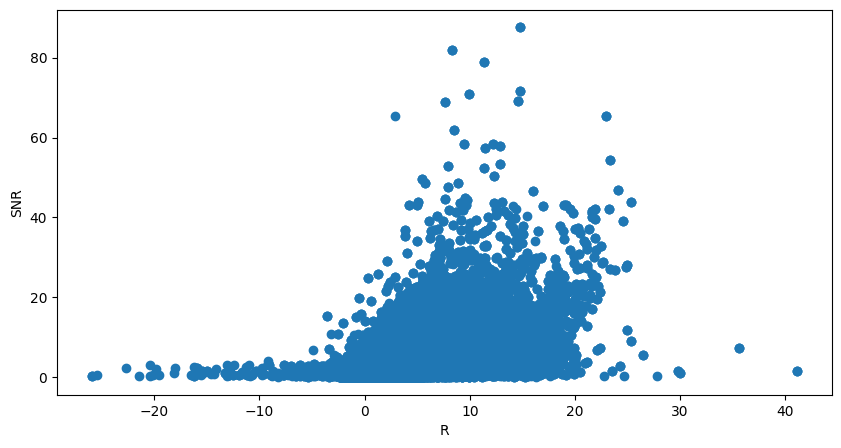

In [13]:
## a heatmap showing the number of data points in each bin of R and SNR
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(fw_filt['R'],fw_filt['SNR'])
ax.set_xlabel('R')
ax.set_ylabel('SNR')
plt.show()

#### A random FWC with high quality

0.060148538850860016


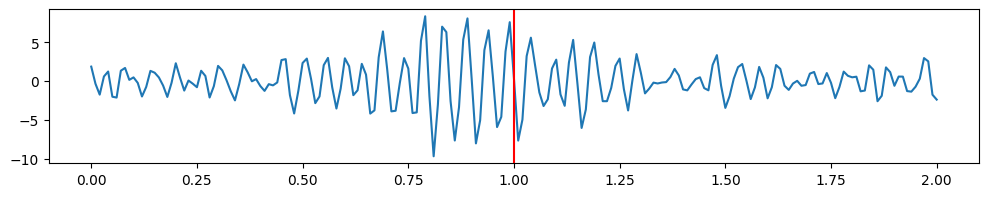

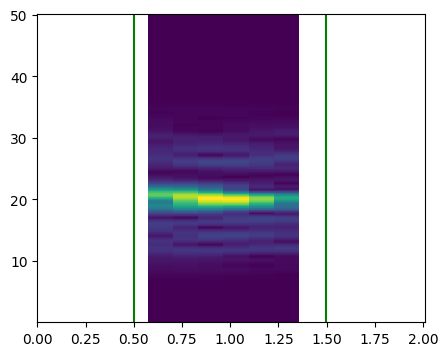

In [14]:

R0 = 5 # set up the minimum R-index value for stronger signal
SNR0 = 5# set up the minimum SNR value for stronger signal
# filter fw_filt by R and SNR in one line
print(len(fw_filt[(fw_filt['R']>R0) & (fw_filt['SNR']>SNR0)])/len(fw_filt))
fw_data_sample = fw_filt[(fw_filt['R']>R0) & (fw_filt['SNR']>SNR0)].sample(n=1).iloc[0]

sac_file = fw_data_sample['file_path']
t0 = UTCDateTime(fw_data_sample['time_window_start'])
t1 = UTCDateTime(fw_data_sample['time_window_end'])
call_t = UTCDateTime(fw_data_sample['time_R_max'])

st = read(sac_file)
st_sliced = st.slice(starttime=t0,endtime=t1)
data_len = len(st_sliced[0].data)
fig,ax = plt.subplots(figsize=(12,2))
ax.plot(np.arange(0,data_len)*0.01,st_sliced[0].data)
ax.axvline(x=call_t-t0,color='red')
# st_sliced.spectrogram();

fig,ax2 = plt.subplots(figsize=(5,4))

st_sliced.spectrogram(axes=ax2);
ax2.axvline(x=call_t-t0-0.5,color='green')
ax2.axvline(x=call_t+0.5-t0,color='green')


#### A random FWC with low quality

0.07864026837828929


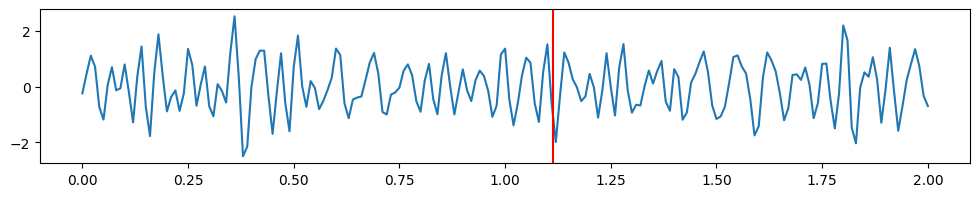

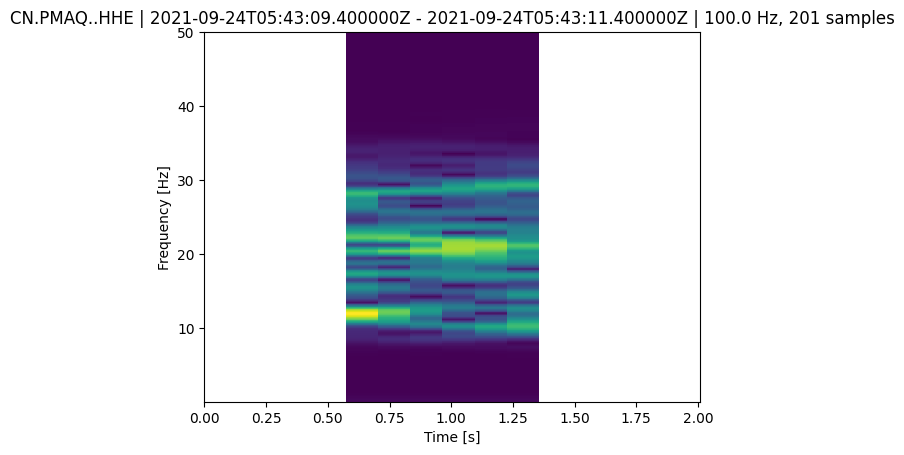

In [15]:

R0 = 1 # set up the minimum R-index value for stronger signal
SNR0 = 1# set up the minimum SNR value for stronger signal
# filter fw_filt by R and SNR in one line
print(len(fw_filt[(fw_filt['R']<R0) & (fw_filt['SNR']<SNR0)])/len(fw_filt))
fw_data_sample = fw_filt[(fw_filt['R']<R0) & (fw_filt['SNR']<SNR0)].sample(n=1).iloc[0]

sac_file = fw_data_sample['file_path']
t0 = UTCDateTime(fw_data_sample['time_window_start'])
t1 = UTCDateTime(fw_data_sample['time_window_end'])
call_t = UTCDateTime(fw_data_sample['time_R_max'])

st = read(sac_file)
st_sliced = st.slice(starttime=t0,endtime=t1)
data_len = len(st_sliced[0].data)
fig,ax = plt.subplots(figsize=(12,2))
ax.plot(np.arange(0,data_len)*0.01,st_sliced[0].data)
ax.axvline(x=call_t-t0,color='red')
st_sliced.spectrogram();



#### A random FW detection with high quality

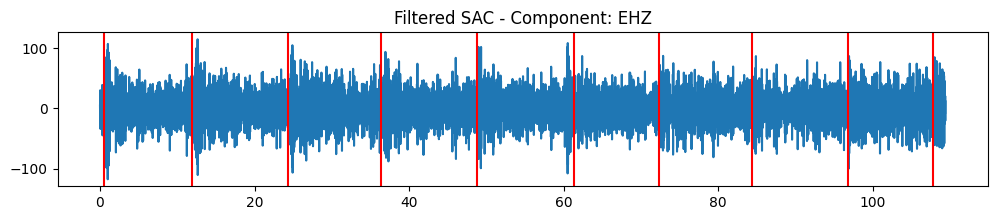

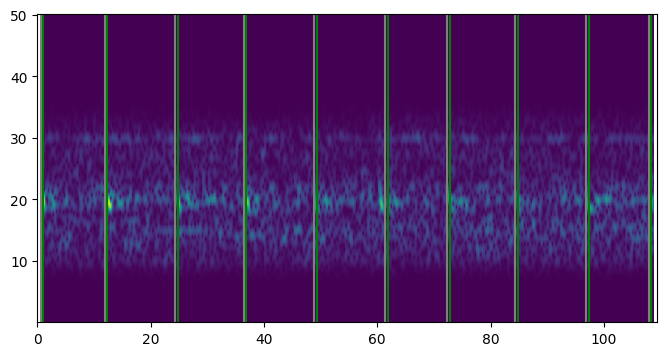

In [16]:
import pandas as pd
import numpy as np
from obspy import read, UTCDateTime
import matplotlib.pyplot as plt
R0=5
SNR0=5
# Create a column containing the average SNR of the same group-id
fw_filt['SNR_avg'] = fw_filt.groupby('group_id')['SNR'].transform('mean')
fw_filt = fw_filt[fw_filt['SNR_avg']>SNR0]
# Create a column containing the average R of the same group-id
fw_filt['R_avg'] = fw_filt.groupby('group_id')['R'].transform('mean')
fw_filt = fw_filt[fw_filt['R_avg']>R0]
## Get a random detection group
fw_detection_group= fw_filt['group_id'].unique()
group_id = np.random.choice(fw_detection_group)

fw_data_sample = fw_filt[fw_filt['group_id']==group_id]

for component in fw_data_sample.component.unique():

    one_component = fw_data_sample[fw_data_sample.component == component].copy()
    ## Get the ealiest time_window_start within the group
    t0 = fw_data_sample.sort_values(by=['time_window_start']).iloc[0]['time_window_start']
    ## Get the latest time_window_end within the group
    t1 = fw_data_sample.sort_values(by=['time_window_start'],ascending=False).iloc[0]['time_window_end']
    ## Get a list of unique call_start_time within the group
    call_list = fw_data_sample['time_call_start'].unique()

    sac_file = fw_data_sample.sample(n=1).iloc[0]['file_path']
    t0 = UTCDateTime(t0)
    t1 = UTCDateTime(t1)

    st = read(sac_file)
    st_sliced = st.slice(starttime=t0,endtime=t1)
    data_len = len(st_sliced[0].data)
    fig,ax = plt.subplots(figsize=(12,2))
    ax.plot(np.arange(0,data_len)*0.01,st_sliced[0].data)
    for call_t in call_list:
        call_t = UTCDateTime(call_t)
        ax.axvline(x=call_t-t0,color='red')
        ax.set_title('Filtered SAC - Component: {}'.format(component))

    fig,ax2 = plt.subplots(figsize=(8,4))
    st_sliced.spectrogram(axes=ax2);
    for call_t in call_list:
        call_t = UTCDateTime(call_t)
        ax2.axvline(x=call_t-t0,color='grey')
        ax2.axvline(x=call_t+0.5-t0,color='green')

In [17]:
fw_data_sample

,file_path,time_window_start,time_window_end,time_R_max,time_call_start,time_call_end,R,SNR,group_id,station_code,whale_type,component,startdate,enddate,SNR_avg,R_avg
220942,/network/projects/aia/whale_call/FILT_10_32/20...,2020-11-06 05:46:05.650,2020-11-06 05:46:07.650,2020-11-06 05:46:06.720633088,2020-11-06 05:46:06.220633088,2020-11-06 05:46:07.220633088,12.079283,12.341500,2956,SMQ,fw,EHZ,2020-11-06 05:46:05.650,2020-11-06 05:46:07.650,6.949756,8.199327
220943,/network/projects/aia/whale_call/FILT_10_32/20...,2020-11-06 05:46:16.530,2020-11-06 05:46:18.530,2020-11-06 05:46:18.028015104,2020-11-06 05:46:17.528015104,2020-11-06 05:46:18.528015104,10.786145,14.621121,2956,SMQ,fw,EHZ,2020-11-06 05:46:16.530,2020-11-06 05:46:18.530,6.949756,8.199327
220944,/network/projects/aia/whale_call/FILT_10_32/20...,2020-11-06 05:46:29.980,2020-11-06 05:46:31.980,2020-11-06 05:46:30.498074112,2020-11-06 05:46:29.998074112,2020-11-06 05:46:30.998074112,9.931886,4.932921,2956,SMQ,fw,EHZ,2020-11-06 05:46:29.980,2020-11-06 05:46:31.980,6.949756,8.199327
220945,/network/projects/aia/whale_call/FILT_10_32/20...,2020-11-06 05:46:41.730,2020-11-06 05:46:43.730,2020-11-06 05:46:42.544126208,2020-11-06 05:46:42.044126208,2020-11-06 05:46:43.044126208,11.033213,8.942552,2956,SMQ,fw,EHZ,2020-11-06 05:46:41.730,2020-11-06 05:46:43.730,6.949756,8.199327
220946,/network/projects/aia/whale_call/FILT_10_32/20...,2020-11-06 05:46:54.440,2020-11-06 05:46:56.440,2020-11-06 05:46:54.988516608,2020-11-06 05:46:54.488516608,2020-11-06 05:46:55.488516608,9.400692,4.351543,2956,SMQ,fw,EHZ,2020-11-06 05:46:54.440,2020-11-06 05:46:56.440,6.949756,8.199327
220947,/network/projects/aia/whale_call/FILT_10_32/20...,2020-11-06 05:47:06.100,2020-11-06 05:47:08.100,2020-11-06 05:47:07.458223616,2020-11-06 05:47:06.958223616,2020-11-06 05:47:07.958223616,-0.738859,3.656014,2956,SMQ,fw,EHZ,2020-11-06 05:47:06.100,2020-11-06 05:47:08.100,6.949756,8.199327
220948,/network/projects/aia/whale_call/FILT_10_32/20...,2020-11-06 05:47:17.870,2020-11-06 05:47:19.870,2020-11-06 05:47:18.496536320,2020-11-06 05:47:17.996536320,2020-11-06 05:47:18.996536320,10.169971,6.911861,2956,SMQ,fw,EHZ,2020-11-06 05:47:17.870,2020-11-06 05:47:19.870,6.949756,8.199327
220949,/network/projects/aia/whale_call/FILT_10_32/20...,2020-11-06 05:47:29.270,2020-11-06 05:47:31.270,2020-11-06 05:47:30.509758208,2020-11-06 05:47:30.009758208,2020-11-06 05:47:31.009758208,7.001694,4.561015,2956,SMQ,fw,EHZ,2020-11-06 05:47:29.270,2020-11-06 05:47:31.270,6.949756,8.199327
220950,/network/projects/aia/whale_call/FILT_10_32/20...,2020-11-06 05:47:42.030,2020-11-06 05:47:44.030,2020-11-06 05:47:43.020372480,2020-11-06 05:47:42.520372480,2020-11-06 05:47:43.520372480,7.691051,6.251648,2956,SMQ,fw,EHZ,2020-11-06 05:47:42.030,2020-11-06 05:47:44.030,6.949756,8.199327
220951,/network/projects/aia/whale_call/FILT_10_32/20...,2020-11-06 05:47:53.070,2020-11-06 05:47:55.070,2020-11-06 05:47:54.020775424,2020-11-06 05:47:53.520775424,2020-11-06 05:47:54.520775424,4.638198,2.927387,2956,SMQ,fw,EHZ,2020-11-06 05:47:53.070,2020-11-06 05:47:55.070,6.949756,8.199327


#### A random FW Detection with low quality

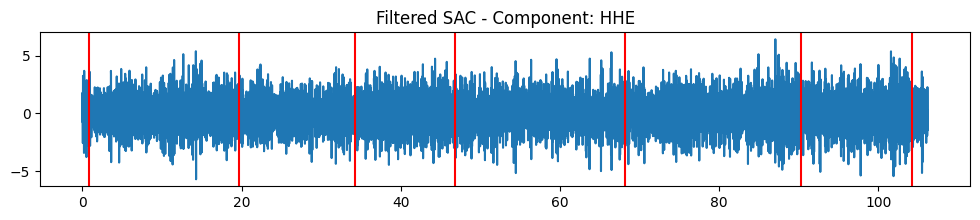

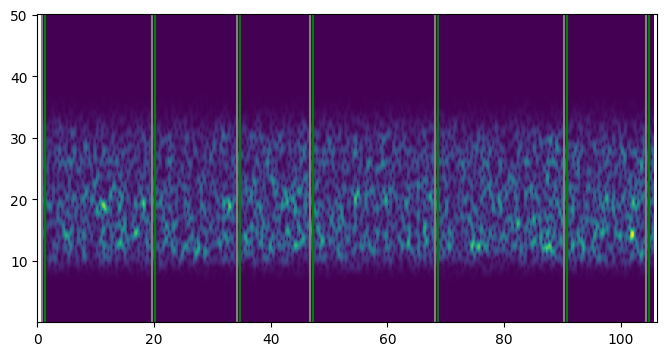

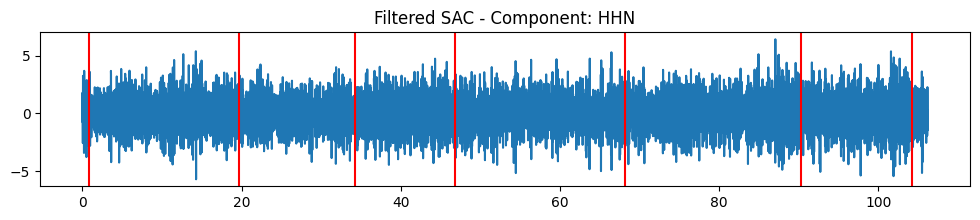

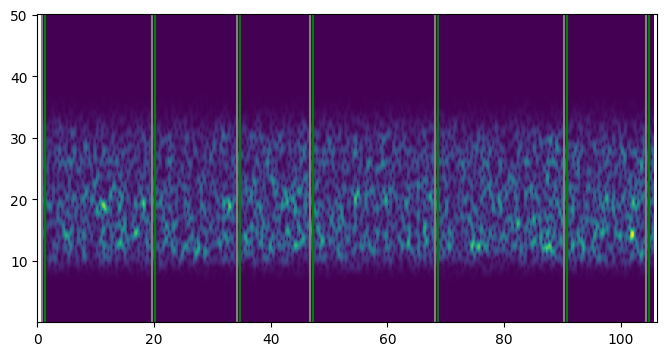

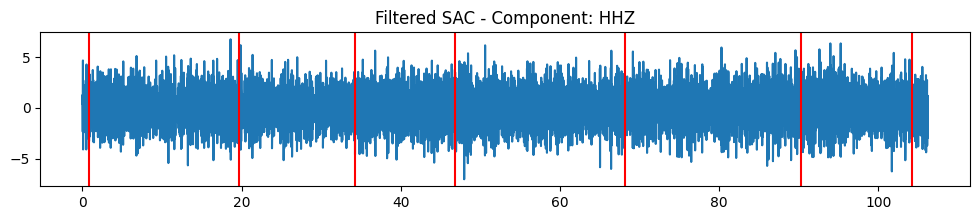

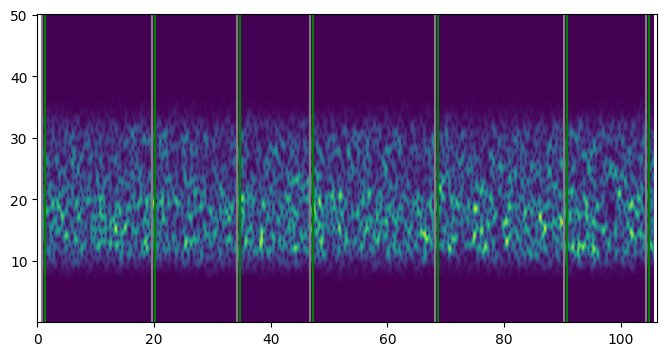

In [22]:
import pandas as pd
import numpy as np
from obspy import read, UTCDateTime
import matplotlib.pyplot as plt
fw_path = '/network/projects/aia/whale_call/LABELS/FW/'
R0=1
SNR0=1
fw_filt = pd.read_csv(fw_path+'fw_LQ_filt.csv')
# Create a column containing the average SNR of the same group-id
fw_filt['SNR_avg'] = fw_filt.groupby('group_id')['SNR'].transform('mean')
fw_filt = fw_filt[fw_filt['SNR_avg']<SNR0]
# Create a column containing the average R of the same group-id
fw_filt['R_avg'] = fw_filt.groupby('group_id')['R'].transform('mean')
fw_filt = fw_filt[fw_filt['R_avg']<R0]
## Get a random detection group
fw_detection_group= fw_filt['group_id'].unique()
group_id = np.random.choice(fw_detection_group)

fw_data_sample = fw_filt[fw_filt['group_id']==group_id]

for component in fw_data_sample.component.unique():

    one_component = fw_data_sample[fw_data_sample.component == component].copy()
    ## Get the ealiest time_window_start within the group
    t0 = fw_data_sample.sort_values(by=['time_window_start']).iloc[0]['time_window_start']
    ## Get the latest time_window_end within the group
    t1 = fw_data_sample.sort_values(by=['time_window_start'],ascending=False).iloc[0]['time_window_end']
    ## Get a list of unique call_start_time within the group
    call_list = fw_data_sample['time_call_start'].unique()

    sac_file = fw_data_sample.sample(n=1).iloc[0]['file_path']
    t0 = UTCDateTime(t0)
    t1 = UTCDateTime(t1)

    st = read(sac_file)
    st_sliced = st.slice(starttime=t0,endtime=t1)
    data_len = len(st_sliced[0].data)
    fig,ax = plt.subplots(figsize=(12,2))
    ax.plot(np.arange(0,data_len)*0.01,st_sliced[0].data)
    for call_t in call_list:
        call_t = UTCDateTime(call_t)
        ax.axvline(x=call_t-t0,color='red')
        ax.set_title('Filtered SAC - Component: {}'.format(component))

    fig,ax2 = plt.subplots(figsize=(8,4))
    st_sliced.spectrogram(axes=ax2);
    for call_t in call_list:
        call_t = UTCDateTime(call_t)
        ax2.axvline(x=call_t-t0,color='grey')
        ax2.axvline(x=call_t+0.5-t0,color='green')

### A selected FW detection

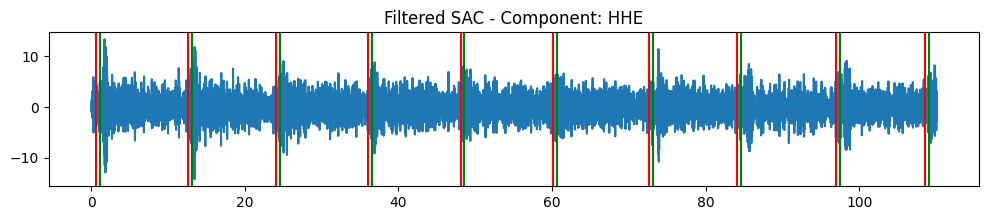

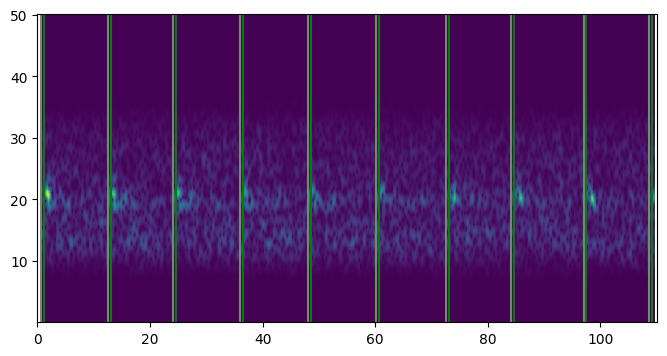

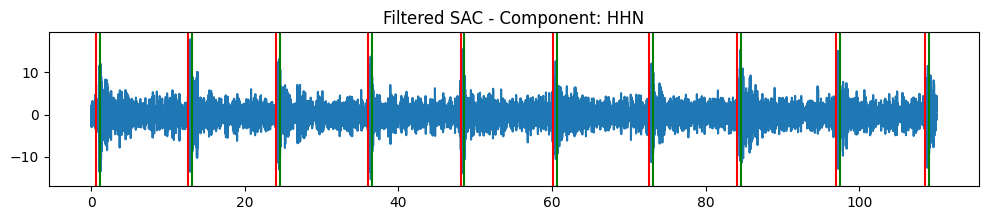

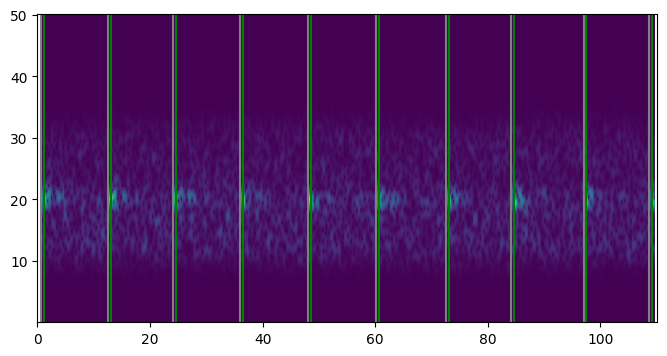

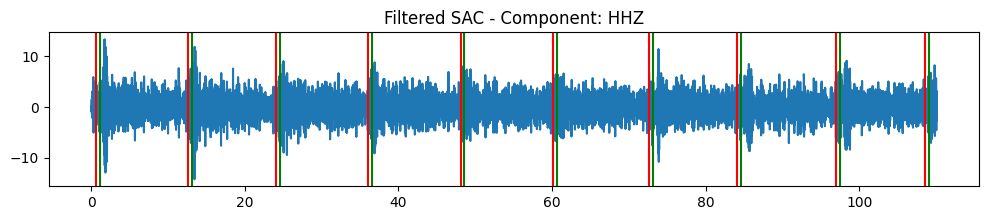

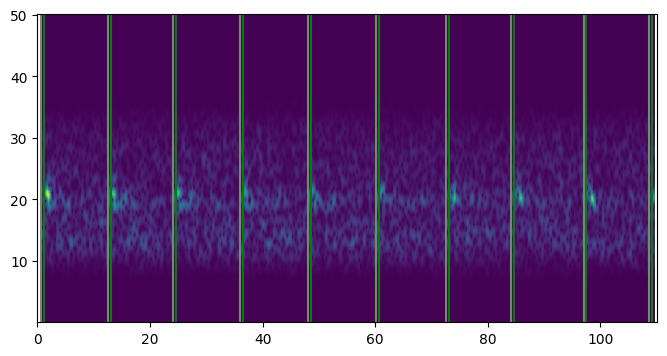

In [23]:
import pandas as pd
import numpy as np
from obspy import read, UTCDateTime
import matplotlib.pyplot as plt
fw_path = '/network/projects/aia/whale_call/LABELS/FW/'

fw_filt = pd.read_csv(fw_path+'fw_LQ_filt.csv')

## Get a random detection group
group_id=2395
fw_data_sample = fw_filt[fw_filt['group_id']==group_id]

for component in fw_data_sample.component.unique():

    one_component = fw_data_sample[fw_data_sample.component == component].copy()
    ## Get the ealiest time_window_start within the group
    t0 = fw_data_sample.sort_values(by=['time_window_start']).iloc[0]['time_window_start']
    ## Get the latest time_window_end within the group
    t1 = fw_data_sample.sort_values(by=['time_window_start'],ascending=False).iloc[0]['time_window_end']
    ## Get a list of unique call_start_time within the group
    call_list = fw_data_sample['time_call_start'].unique()

    sac_file = fw_data_sample.sample(n=1).iloc[0]['file_path']
    t0 = UTCDateTime(t0)
    t1 = UTCDateTime(t1)

    st = read(sac_file)
    st_sliced = st.slice(starttime=t0,endtime=t1)
    data_len = len(st_sliced[0].data)
    fig,ax = plt.subplots(figsize=(12,2))
    ax.plot(np.arange(0,data_len)*0.01,st_sliced[0].data)
    for call_t in call_list:
        call_t = UTCDateTime(call_t)
        ax.axvline(x=call_t-t0,color='red')
        ax.axvline(x=call_t+0.5-t0,color='green')
    ax.set_title('Filtered SAC - Component: {}'.format(component))

    fig,ax2 = plt.subplots(figsize=(8,4))
    st_sliced.spectrogram(axes=ax2);
    for call_t in call_list:
        call_t = UTCDateTime(call_t)
        ax2.axvline(x=call_t-t0,color='grey')
        ax2.axvline(x=call_t+0.5-t0,color='green')


### BW

#### Quality Metric Visualization

In [ ]:
import pandas as pd
import numpy as np
from obspy import read, UTCDateTime
import matplotlib.pyplot as plt
fw_path = '/network/projects/aia/whale_call/LABELS/BW/'

bw_filt = pd.read_csv(fw_path+'bw_filt.csv')
## plot histogram of R and SNR in fw_filt  
fig,ax = plt.subplots(1,2,figsize=(7,3))
ax[0].hist(bw_filt['R'],bins=100)
ax[0].set_xlabel('R')
ax[0].set_ylabel('Count')
ax[1].hist(bw_filt['SNR'],bins=100)
ax[1].set_xlabel('SNR')
ax[1].set_ylabel('Count')
plt.show()



In [ ]:
print(bw_filt['R'].quantile([0.1,0.25,0.5,0.75,0.9]))
print(bw_filt['SNR'].quantile([0.1,0.25,0.5,0.75,0.9]))

In [ ]:
## a heatmap showing the number of data points in each bin of R and SNR
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(bw_filt['R'],bw_filt['SNR'])
ax.set_xlabel('R')
ax.set_ylabel('SNR')
plt.show()

#### A random BWC with high quality

In [ ]:
fw_path = '/network/projects/aia/whale_call/LABELS/BW/'

bw_filt = pd.read_csv(fw_path+'bw_filt.csv')
R0 = 5 # set up the minimum R-index value for stronger signal
SNR0 = 5# set up the minimum SNR value for stronger signal
# filter fw_filt by R and SNR in one line
print(len(bw_filt[(bw_filt['R']>R0) & (bw_filt['SNR']>SNR0)])/len(bw_filt))
bw_data_sample = bw_filt[(bw_filt['R']>R0) & (bw_filt['SNR']>SNR0)].sample(n=1).iloc[0]

sac_file = bw_data_sample['file_path']
t0 = UTCDateTime(bw_data_sample['time_window_start'])
t1 = UTCDateTime(bw_data_sample['time_window_end'])
call_t = UTCDateTime(bw_data_sample['time_R_max'])

st = read(sac_file)
st_sliced = st.slice(starttime=t0,endtime=t1)
data_len = len(st_sliced[0].data)
fig,ax = plt.subplots(figsize=(12,2))
ax.plot(np.arange(0,data_len)*0.01,st_sliced[0].data)
ax.axvline(x=call_t-t0,color='red')
# st_sliced.spectrogram();
fig,ax2 = plt.subplots(figsize=(8,4))
st_sliced.spectrogram(axes=ax2);
ax2.axvline(x=call_t-t0-4,color='green')
ax2.axvline(x=call_t-t0+4,color='green')


#### A random BWC with low quality

In [ ]:

fw_path = '/network/projects/aia/whale_call/LABELS/BW/'
bw_filt = pd.read_csv(fw_path+'bw_filt.csv')
R0 = 1 # set up the minimum R-index value for stronger signal
SNR0 = 1# set up the minimum SNR value for stronger signal
# filter fw_filt by R and SNR in one line
print(len(bw_filt[(bw_filt['R']<R0) & (bw_filt['SNR']<SNR0)])/len(bw_filt))
bw_data_sample = bw_filt[(bw_filt['R']<R0) & (bw_filt['SNR']<SNR0)].sample(n=1).iloc[0]

sac_file = bw_data_sample['file_path']
t0 = UTCDateTime(bw_data_sample['time_window_start'])
t1 = UTCDateTime(bw_data_sample['time_window_end'])
call_t = UTCDateTime(bw_data_sample['time_R_max'])

st = read(sac_file)
st_sliced = st.slice(starttime=t0,endtime=t1)
data_len = len(st_sliced[0].data)
fig,ax = plt.subplots(figsize=(12,2))
ax.plot(np.arange(0,data_len)*0.01,st_sliced[0].data)
ax.axvline(x=call_t-t0,color='red')

fig,ax2 = plt.subplots(figsize=(8,4))
st_sliced.spectrogram(axes=ax2);
# st_sliced.spectrogram();
ax2.axvline(x=call_t-t0-4,color='grey')
ax2.axvline(x=call_t+4-t0,color='green')

#### A random BW detection with high quality

In [ ]:
import pandas as pd
import numpy as np
from obspy import read, UTCDateTime
fw_path = '/network/projects/aia/whale_call/LABELS/BW/'

bw_filt = pd.read_csv(fw_path+'bw_filt.csv')
R0=5
SNR0=5
# Create a column containing the average SNR of the same group-id
bw_filt['SNR_avg'] = bw_filt.groupby('group_id')['SNR'].transform('mean')
bw_filt = bw_filt[bw_filt['SNR_avg']>SNR0]
# Create a column containing the average R of the same group-id
bw_filt['R_avg'] = bw_filt.groupby('group_id')['R'].transform('mean')
bw_filt = bw_filt[bw_filt['R_avg']>R0]
## Get a random detection group
bw_detection_group= bw_filt['group_id'].unique()
group_id = np.random.choice(bw_detection_group)

bw_data_sample = bw_filt[bw_filt['group_id']==group_id]

for component in bw_data_sample.component.unique():

    one_component = bw_data_sample[bw_data_sample.component == component].copy()
    ## Get the ealiest time_window_start within the group
    t0 = bw_data_sample.sort_values(by=['time_window_start']).iloc[0]['time_window_start']
    ## Get the latest time_window_end within the group
    t1 = bw_data_sample.sort_values(by=['time_window_start'],ascending=False).iloc[0]['time_window_end']
    ## Get a list of unique call_start_time within the group
    call_list = bw_data_sample['time_R_max'].unique()

    sac_file = bw_data_sample.sample(n=1).iloc[0]['file_path']
    t0 = UTCDateTime(t0)
    t1 = UTCDateTime(t1)

    st = read(sac_file)
    st_sliced = st.slice(starttime=t0,endtime=t1)
    data_len = len(st_sliced[0].data)
    fig,ax = plt.subplots(figsize=(12,2))
    ax.plot(np.arange(0,data_len)*0.01,st_sliced[0].data)
    for call_t in call_list:
        call_t = UTCDateTime(call_t)
        ax.axvline(x=call_t-t0,color='red')
        ax.set_title('Filtered SAC - Component: {}'.format(component))

    fig,ax2 = plt.subplots(figsize=(8,4))
    st_sliced.spectrogram(axes=ax2);
    for call_t in call_list:
        call_t = UTCDateTime(call_t)
        ax2.axvline(x=call_t-t0-4,color='grey')
        ax2.axvline(x=call_t+4-t0,color='green')

#### A random BW detection with low quality

In [ ]:
import pandas as pd
import numpy as np
from obspy import read, UTCDateTime
fw_path = '/network/projects/aia/whale_call/LABELS/BW/'

bw_filt = pd.read_csv(fw_path+'bw_filt.csv')
R0=1
SNR0=1
# Create a column containing the average SNR of the same group-id
bw_filt['SNR_avg'] = bw_filt.groupby('group_id')['SNR'].transform('mean')
bw_filt = bw_filt[bw_filt['SNR_avg']<SNR0]
# Create a column containing the average R of the same group-id
bw_filt['R_avg'] = bw_filt.groupby('group_id')['R'].transform('mean')
bw_filt = bw_filt[bw_filt['R_avg']<R0]
## Get a random detection group
bw_detection_group= bw_filt['group_id'].unique()
group_id = np.random.choice(bw_detection_group)

bw_data_sample = bw_filt[bw_filt['group_id']==group_id]

for component in bw_data_sample.component.unique():

    one_component = bw_data_sample[bw_data_sample.component == component].copy()
    ## Get the ealiest time_window_start within the group
    t0 = bw_data_sample.sort_values(by=['time_window_start']).iloc[0]['time_window_start']
    ## Get the latest time_window_end within the group
    t1 = bw_data_sample.sort_values(by=['time_window_start'],ascending=False).iloc[0]['time_window_end']
    ## Get a list of unique call_start_time within the group
    call_list = bw_data_sample['time_R_max'].unique()

    sac_file = bw_data_sample.sample(n=1).iloc[0]['file_path']
    t0 = UTCDateTime(t0)
    t1 = UTCDateTime(t1)

    st = read(sac_file)
    st_sliced = st.slice(starttime=t0,endtime=t1)
    data_len = len(st_sliced[0].data)
    fig,ax = plt.subplots(figsize=(12,2))
    ax.plot(np.arange(0,data_len)*0.01,st_sliced[0].data)
    for call_t in call_list:
        call_t = UTCDateTime(call_t)
        ax.axvline(x=call_t-t0,color='red')
        ax.set_title('Filtered SAC - Component: {}'.format(component))

    fig,ax2 = plt.subplots(figsize=(8,4))
    st_sliced.spectrogram(axes=ax2);
    for call_t in call_list:
        call_t = UTCDateTime(call_t)
        ax2.axvline(x=call_t-t0-4,color='grey')
        ax2.axvline(x=call_t+4-t0,color='green')